
# Coursera Capstone of Data Science - Data Analysis of Population Density and Venues in Munich

### This notebook is used for showing the analysis of population density and venues in Munich

## Introduction

### Description and Discussion of Background

Munich as the largest city of Bavaria, the third largest city in Germany behind Berlin and Hamburg is one of the rapidest growing cities in Germany. Along with the development of the city Munich is also a top destination for immigrants. The estimated population of Munich in 2019 is about 1.45 million and the the population density is at 4,500 per square kilometer, which is the highest in the country. 

The growth of industry and population makes Munich a hot city to do investments. There are 25 boroughs in Munich and every borough has different popular venues and population density. The relationship of population density could be a very interesting point for investors to consider which addresses the problem I want to analyze. 

A good way to analyze and visualize the problem is to create a map with information of people density and clustered venues' information.

### Data Description
The needed data consist of three parts: geographic data, population data and venues data.

- geographic data can be obtained from google map, wikepedia
- population data can be aquaired from database of government in Munich like https://www.opengov-muenchen.de/dataset/indikatorenatlas-bevoelkerung-natuerlicher-saldo-auf-1000-einwohner-innen-83r65mct and wikipedia https://de.wikipedia.org/wiki/Stadtbezirke_M%C3%BCnchens
- venues data can be obtained from Forsquare database.

## Methodology

The main database consists of five elements: Nr. which means the borough's number, borough's name, population density, latitude and longitude of every borough.

With the help of package FOLIUM the boroughs can be visualized as blow:


Based on the coordinates of every borough Foursquare API can help us find the most visited venues in the borough. In my case I am interested in the top 100 venues within 1km. After getting the response data from Foursquare API a dataframe with information of borough and its top 100 venues can be obtained.

Since the types of venues can indicate the type of borough, we can use the top ten most common venues to deduce the type of the borough. To achieve this goal K-means algorithm for clustering is a very good tool to cluster the boroughs because the problem is a typical unsupervised learning case and K-means algorithm is one of the most common used algorithm for that.


The boroughs are clustered into 5 clusters. Based on the most common visited venues of every cluster, which is listed in table below, we can define every cluster as:
-
-
-

And the clustered boroughs can be visualized on the map:



The population density of every boroughs can be shown here:


## Results

The relationship of the population density and type of borough can be concluded as 


## Discussion

Based on the results I would like to recommend the investors to invest in the borough which has a large population density

## Conclusion

There will be more business chance if there are more people

In [3]:
#### Get the data!
import requests

website_url = requests.get('https://de.wikipedia.org/wiki/Stadtbezirke_M%C3%BCnchens').text


from bs4 import BeautifulSoup
soup=BeautifulSoup(website_url, 'lxml')
#print(soup.prettify())

My_table=soup.find('table', {'class':'wikitable sortable'})
#print(My_table)

headers = [header.text for header in My_table.find_all('th')]
headers[5] = headers[5][:-1]
headers

rows = []
for row in My_table.find_all('tr'):
    rows.append([val.text for val in row.find_all('td')])
    
import pandas as pd
df = pd.DataFrame(rows, columns = headers)
df.head()

df_valid=df[df.Stadtbezirk.notnull()].reset_index()
df_valid[r'Dichte(Einw./km²)']=df_valid[r'Dichte(Einw./km²)'].apply(pd.to_numeric).mul(1000)

#print(df_valid)
import types
#import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_0321b56dca0b4cfd875147bcc41dc9c5 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='XV1QW3EYRjVDrxhMZELY3qnfLrFUtW0lbJFoIhwK9zKS',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_0321b56dca0b4cfd875147bcc41dc9c5.get_object(Bucket='myfirstproject-donotdelete-pr-hweljsjt40fuee',Key='munich_boroughs.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

#df_data_1 = pd.read_csv(body)
#df_data_1.head()

df_coordinate=pd.read_csv(body)
df_coordinate.head()

df_valid['Latitude'] = df_coordinate['Latitude']
df_valid['Longitude'] = df_coordinate['Longitude']
df_boroughs=df_valid.dropna(axis=0)

df_boroughs = df_boroughs.drop(['index', r'Fläche(km²)', 'Einwohner', r'Ausländer(%)'], 1)

df_boroughs.head()

,Nr.,Stadtbezirk,Dichte(Einw./km²),Latitude,Longitude
0,1,Altstadt-Lehel,6820.0,48.137828,11.574582
1,2,Ludwigsvorstadt-Isarvorstadt,12477.0,48.131771,11.555809
2,3,Maxvorstadt,12435.0,48.146570,11.571445
3,4,Schwabing-West,15908.0,48.164417,11.570364
4,5,Au-Haidhausen,14693.0,48.128753,11.590536


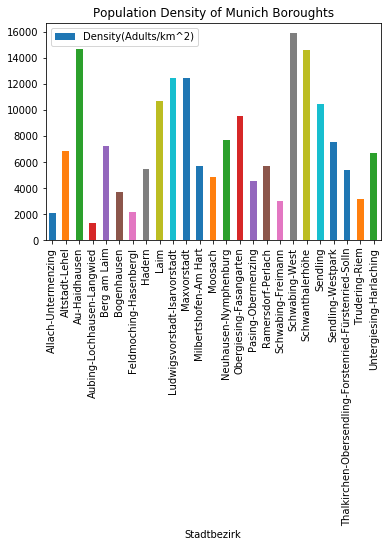

In [5]:
ax = df_boroughs.sort_values(by='Stadtbezirk', ascending=True).plot.bar(x='Stadtbezirk', y=r'Dichte(Einw./km²)', rot=90, title='Population Density of Munich Boroughts')
ax.legend(['Density(Adults/km^2)'])

In [6]:
from geopy.geocoders import Nominatim
address = 'Munich'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Munich are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Munich are 48.1371079, 11.5753822.


### Create a map of Munich Boroughs

In [8]:
!conda install -c conda-forge folium=0.5.0 --yes

import folium
map_munich = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(df_boroughs['Latitude'], df_boroughs['Longitude'], df_boroughs['Stadtbezirk']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_munich)  
    
map_munich

Fetching package metadata .............
Solving package specifications: .

### Call Foursquare Service

In [9]:
CLIENT_ID = 'VQFYBJNOMULDZ222T144YBZM43GIG3IKBC04UEDC1XMY2ZLC' # your Foursquare ID
CLIENT_SECRET = 'RKWE4ISAVRUN51ZH31NH4XSXWQ5CISD2SRWU0GWBKHYJ4IYC' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: VQFYBJNOMULDZ222T144YBZM43GIG3IKBC04UEDC1XMY2ZLC
CLIENT_SECRET:RKWE4ISAVRUN51ZH31NH4XSXWQ5CISD2SRWU0GWBKHYJ4IYC


### Define function to get nearby venues

In [10]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Get nearby venues of each neighbourhood

In [11]:
LIMIT = 100
munich_venues = getNearbyVenues(names=df_boroughs['Stadtbezirk'],
                                   latitudes=df_boroughs['Latitude'],
                                   longitudes=df_boroughs['Longitude']
                                  )

print(munich_venues.shape)
munich_venues.head()

Altstadt-Lehel
Ludwigsvorstadt-Isarvorstadt
Maxvorstadt
Schwabing-West
Au-Haidhausen
Sendling
Sendling-Westpark
Schwanthalerhöhe
Neuhausen-Nymphenburg
Moosach
Milbertshofen-Am Hart
Schwabing-Freimann
Bogenhausen
Berg am Laim
Trudering-Riem
Ramersdorf-Perlach
Obergiesing-Fasangarten
Untergiesing-Harlaching
Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln
Hadern
Pasing-Obermenzing
Aubing-Lochhausen-Langwied
Allach-Untermenzing
Feldmoching-Hasenbergl
Laim
(1535, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Altstadt-Lehel,48.137828,11.574582,Marienplatz,48.137177,11.575561,Plaza
1,Altstadt-Lehel,48.137828,11.574582,Fischbrunnen,48.137211,11.576047,Fountain
2,Altstadt-Lehel,48.137828,11.574582,Alois Dallmayr,48.138554,11.576750,Gourmet Shop
3,Altstadt-Lehel,48.137828,11.574582,St. Peter,48.136530,11.575615,Church
4,Altstadt-Lehel,48.137828,11.574582,Kustermann,48.136242,11.574897,Department Store


### Count the venues of each neighbourhood


In [12]:
munich_venues.groupby('Borough').count()

,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Borough,,,,,,
Allach-Untermenzing,16,16,16,16,16,16
Altstadt-Lehel,100,100,100,100,100,100
Au-Haidhausen,100,100,100,100,100,100
Aubing-Lochhausen-Langwied,12,12,12,12,12,12
Berg am Laim,41,41,41,41,41,41
Bogenhausen,35,35,35,35,35,35
Feldmoching-Hasenbergl,16,16,16,16,16,16
Hadern,38,38,38,38,38,38
Laim,67,67,67,67,67,67


### one hot encoding

In [13]:
# one hot encoding
munich_onehot = pd.get_dummies(munich_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
munich_onehot['Borough'] = munich_venues['Borough'] 

# move neighborhood column to the first column
fixed_columns = [munich_onehot.columns[-1]] + list(munich_onehot.columns[:-1])
munich_onehot = munich_onehot[fixed_columns]

munich_onehot.head()

munich_onehot.shape

(1535, 223)

In [14]:
munich_grouped = munich_onehot.groupby('Borough').mean().reset_index()
munich_grouped

,Borough,Afghan Restaurant,African Restaurant,American Restaurant,Aquarium,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Austrian Restaurant,...,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Wine Bar,Wine Shop,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,Allach-Untermenzing,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
1,Altstadt-Lehel,0.010000,0.00,0.010000,0.000000,0.000000,0.01,0.000000,0.000000,0.000000,...,0.01,0.000000,0.000000,0.010000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
2,Au-Haidhausen,0.020000,0.00,0.000000,0.000000,0.000000,0.00,0.010000,0.000000,0.000000,...,0.01,0.000000,0.000000,0.010000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
3,Aubing-Lochhausen-Langwied,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
4,Berg am Laim,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.048780,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
5,Bogenhausen,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.00,0.000000,0.028571,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
6,Feldmoching-Hasenbergl,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
7,Hadern,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.026316,0.026316,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
8,Laim,0.000000,0.00,0.014925,0.000000,0.014925,0.00,0.000000,0.014925,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
9,Ludwigsvorstadt-Isarvorstadt,0.000000,0.01,0.000000,0.000000,0.020000,0.00,0.020000,0.000000,0.000000,...,0.01,0.030000,0.000000,0.010000,0.010000,0.000000,0.01,0.000000,0.000000,0.000000


In [15]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Top 10 venues of Borough

In [16]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
borough_venues_sorted = pd.DataFrame(columns=columns)
borough_venues_sorted['Borough'] = munich_grouped['Borough']

for ind in np.arange(munich_grouped.shape[0]):
    borough_venues_sorted.iloc[ind, 1:] = return_most_common_venues(munich_grouped.iloc[ind, :], num_top_venues)

borough_venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allach-Untermenzing,German Restaurant,Bakery,Sporting Goods Shop,Supermarket,Drugstore,Bank,Italian Restaurant,Hotel,Bus Stop,Liquor Store
1,Altstadt-Lehel,Café,German Restaurant,Bavarian Restaurant,Hotel,Plaza,Restaurant,Bar,Department Store,Church,Cocktail Bar
2,Au-Haidhausen,Café,Italian Restaurant,German Restaurant,Indian Restaurant,Plaza,Ice Cream Shop,Afghan Restaurant,Pub,Beach,Beer Garden
3,Aubing-Lochhausen-Langwied,Bakery,Hotel,Supermarket,Greek Restaurant,Soccer Field,Gym / Fitness Center,German Restaurant,Fish Market,Fast Food Restaurant,Farmers Market
4,Berg am Laim,Hotel,Tram Station,Bus Stop,Bakery,German Restaurant,Bavarian Restaurant,Metro Station,Asian Restaurant,Supermarket,Miscellaneous Shop


### Cluster neighbourhood

#### Determin the best kcluster number first

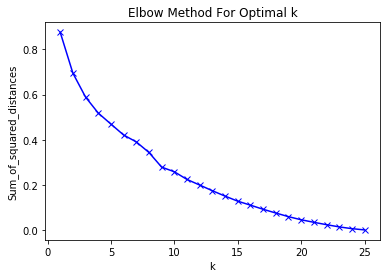

In [17]:
from sklearn.cluster import KMeans
munich_grouped_clustering = munich_grouped.drop('Borough', 1)

Sum_of_squared_distances = []
K = range(1,26)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(munich_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

    
import matplotlib.pyplot as plt
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [18]:
# set number of clusters
kclusters = 3



# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(munich_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 2, 0, 1, 1, 1, 1, 1, 2], dtype=int32)

In [19]:
# add clustering labels
borough_venues_sorted.insert(1, 'Cluster Labels', kmeans.labels_)


In [20]:
munich_merged = df_boroughs

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
munich_merged = munich_merged.join(borough_venues_sorted.set_index('Borough'), on='Stadtbezirk')

munich_merged

,Nr.,Stadtbezirk,Dichte(Einw./km²),Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Altstadt-Lehel,6820.0,48.137828,11.574582,2,Café,German Restaurant,Bavarian Restaurant,Hotel,Plaza,Restaurant,Bar,Department Store,Church,Cocktail Bar
1,2,Ludwigsvorstadt-Isarvorstadt,12477.0,48.131771,11.555809,2,Hotel,Café,Italian Restaurant,German Restaurant,Nightclub,Burger Joint,Vietnamese Restaurant,Middle Eastern Restaurant,Bavarian Restaurant,Ice Cream Shop
2,3,Maxvorstadt,12435.0,48.146570,11.571445,2,Café,Bar,Art Museum,Plaza,History Museum,Restaurant,Italian Restaurant,German Restaurant,Cocktail Bar,Pub
3,4,Schwabing-West,15908.0,48.164417,11.570364,2,Italian Restaurant,Café,Bar,Vietnamese Restaurant,Trattoria/Osteria,Coffee Shop,Park,Greek Restaurant,Bakery,Breakfast Spot
4,5,Au-Haidhausen,14693.0,48.128753,11.590536,2,Café,Italian Restaurant,German Restaurant,Indian Restaurant,Plaza,Ice Cream Shop,Afghan Restaurant,Pub,Beach,Beer Garden
5,6,Sendling,10468.0,48.118012,11.539083,2,Supermarket,Italian Restaurant,Restaurant,Hotel,Drugstore,Café,German Restaurant,Vietnamese Restaurant,Bus Stop,Trattoria/Osteria
6,7,Sendling-Westpark,7572.0,48.118031,11.519333,1,Bus Stop,Supermarket,Intersection,Greek Restaurant,Garden,Restaurant,Drugstore,Bakery,German Restaurant,Hotel
7,8,Schwanthalerhöhe,14628.0,48.134230,11.539034,2,Hotel,Café,Italian Restaurant,Doner Restaurant,Asian Restaurant,Ice Cream Shop,Bar,Concert Hall,German Restaurant,Pizza Place
8,9,Neuhausen-Nymphenburg,7707.0,48.154222,11.531517,2,Italian Restaurant,German Restaurant,Café,Bakery,Restaurant,Greek Restaurant,Sushi Restaurant,Indian Restaurant,Tram Station,Supermarket
9,10,Moosach,4855.0,48.179895,11.510571,0,Bakery,Drugstore,Hotel,Supermarket,Trattoria/Osteria,Plaza,Sandwich Place,Shopping Mall,Fast Food Restaurant,Food


In [21]:
munich_merged_grouped=munich_merged.groupby(['Cluster Labels', '1st Most Common Venue']).count()

munich_merged_grouped

Nr.  Stadtbezirk  Dichte(Einw./km²)  \
Cluster Labels 1st Most Common Venue                                        
0              Bakery                   2            2                  2   
               German Restaurant        1            1                  1   
               Supermarket              1            1                  1   
1              Bus Stop                 7            7                  7   
               Hotel                    1            1                  1   
2              Café                     3            3                  3   
               Hotel                    3            3                  3   
               Italian Restaurant       2            2                  2   
               Supermarket              4            4                  4   
               Zoo Exhibit              1            1                  1   

                                      Latitude  Longitude  \
Cluster Labels 1st Most Common Venue                        
0              Bakery                        2          2   
               German Restaurant             1          1   
               Supermarket                   1          1   
1              Bus Stop                      7          7   
               Hotel                         1          1   
2              Café                          3          3   
               Hotel                         3          3   
               Italian Restaurant            2          2   
               Supermarket                   4          4   
               Zoo Exhibit                   1          1   

                                      2nd Most Common Venue  \
Cluster Labels 1st Most Common Venue                          
0              Bakery                                     2   
               German Restaurant                          1   
               Supermarket                                1   
1              Bus Stop                                   7   
               Hotel                                      1   
2              Café                                       3   
               Hotel                                      3   
               Italian Restaurant                         2   
               Supermarket                                4   
               Zoo Exhibit                                1   

                                      3rd Most Common Venue  \
Cluster Labels 1st Most Common Venue                          
0              Bakery                                     2   
               German Restaurant                          1   
               Supermarket                                1   
1              Bus Stop                                   7   
               Hotel                                      1   
2              Café                                       3   
               Hotel                                      3   
               Italian Restaurant                         2   
               Supermarket                                4   
               Zoo Exhibit                                1   

                                      4th Most Common Venue  \
Cluster Labels 1st Most Common Venue                          
0              Bakery                                     2   
               German Restaurant                          1   
               Supermarket                                1   
1              Bus Stop                                   7   
               Hotel                                      1   
2              Café                                       3   
               Hotel                                      3   
               Italian Restaurant                         2   
               Supermarket                                4   
               Zoo Exhibit                                1   

                                      5th Most Common Venue  \
Cluster Labels 1st Most Common Venue          

In [22]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(munich_merged['Latitude'], munich_merged['Longitude'], munich_merged['Stadtbezirk'], munich_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters